# <center>FIFA 18 Player Dataset Exploration</center>
![fifa](images\fifa.jpg)

# Table of contents
1. [Initial Exploration](#initial)
2. [Positions](#positions)
3. [Height and Weight](#height)
4. [Top 5 Leagues](#leagues)
5. [England vs. Germany PKs](#PKs)
6. [Southpaws](#southpaws)
6. [Similarity](#similarity)

# Initial Exploration <a name="initial"></a>
The FIFA videogame franchise is a worldwide phenomenon, accounting for [roughly 40%](https://www.forbes.com/sites/greatspeculations/2017/10/10/fifa-remains-eas-bread-and-butter/#4b55f3ef2140) of Electronic Arts' yearly revenue. FIFA 18, released in Nov. 2017, sold 5.9 million units in its first week alone, and surpassed 10 million units by the end of the year. In order to meet the demands of soccer fanatics across the globe, EA strives for accuracy, and as such, each FIFA iteration includes an enormous database of player statistics. In this notebook, we explore the FIFA 18 database (retrieved from [Kaggle](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset)).

Let's begin by getting an idea at the scope of the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.style.use('seaborn')

fifa = pd.read_csv('complete.csv')

In [2]:
print('Players:', '\t', fifa.shape[0], '\n',
      'Nationalities:', '\t', fifa.groupby('nationality')['ID'].count().size, '\n',
      'Clubs:', '\t\t', fifa.groupby('club')['ID'].count().size, '\n',
      'Leagues:', '\t', fifa.groupby('league')['ID'].count().size, sep='')

Players:	17994
Nationalities:	164
Clubs:		647
Leagues:	41


Wow, that is a lot of players and clubs. Now let's look at what data the dataframe actually contains. Note that the players in the dataframe are indexed in descending order based on the **overall** stat, which is commonly viewed as the most important/significant stat for a player.

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(fifa.head())

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,

Each row represents a different player, and each player has 185 different stat fields in the dataframe. The columns contain a variety of different data types including strings, ints, and booleans. Let's examine the most common nationalities over the entire dataframe. (We also add a "Rank" column, in case our grouping later on changes the initial indexing.)

In [4]:
fifa['Rank']=fifa.index+1
fifa.groupby('nationality')['ID'].count().sort_values(ascending=False).head(10)

nationality
England        1631
Germany        1147
Spain          1020
France          966
Argentina       962
Brazil          806
Italy           800
Colombia        593
Japan           471
Netherlands     430
Name: ID, dtype: int64

Let's also take a look at the 30 least common nationalities.

In [5]:
fifa.groupby('nationality')['ID'].count().sort_values(ascending=False).tail(30)

nationality
New Caledonia          2
Kuwait                 2
Namibia                2
Cuba                   2
Ethiopia               2
Mauritania             2
Libya                  2
Gibraltar              2
Liberia                2
El Salvador            2
Oman                   1
São Tomé & Príncipe    1
Kyrgyzstan             1
Hong Kong              1
Turkmenistan           1
Barbados               1
Guatemala              1
Vietnam                1
Fiji                   1
Eritrea                1
Swaziland              1
Belize                 1
Guam                   1
St Lucia               1
Sri Lanka              1
Somalia                1
San Marino             1
Burundi                1
Mauritius              1
Grenada                1
Name: ID, dtype: int64

In later explorations, for statistical significance, we will filter out countries that have very few players.

Instead of just looking at the raw number of players from each country, let's see how many players from each country have an overall FIFA rating of 80 or above. (80 is a very high score; these players are ranked as the top 524 players in the world).

In [6]:
fifa[fifa.overall>=80].groupby('nationality')['ID'].count().sort_values(ascending=False).head(10)

nationality
Spain        80
Germany      48
Brazil       48
France       47
Italy        37
England      33
Argentina    31
Portugal     21
Belgium      19
Croatia      13
Name: ID, dtype: int64

Comparing this filtered player count to the raw player count, we see that Spain vastly outperforms expectations in terms of great players with 80 players out of 1020 with an overall ranking 80 or higher. On the other hand, England seems to be underperforming with only 33 players out of 1631 meeting the same ranking requirement. Let's compare the distribution of the overall ratings.

Text(0,0.5,'Probability Density')

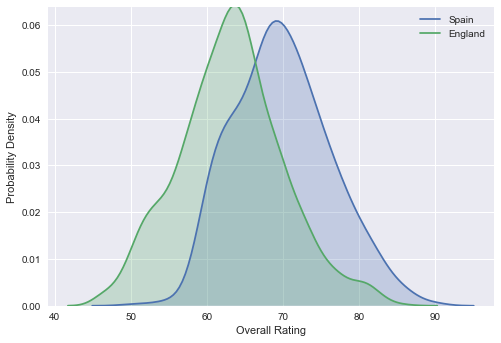

In [7]:
sns.kdeplot(fifa[fifa.nationality=='Spain']['overall'], label='Spain', shade=True)
sns.kdeplot(fifa[fifa.nationality=='England']['overall'], label='England', shade=True)
plt.xlabel('Overall Rating')
plt.ylabel('Probability Density')

This PDF comparison is illuminating, showing how many more elite-level players Spain has as compared to England.

# Positions <a name="positions"></a>
Let's shift our focus towards positions. At the very basic level, soccer positions can be split into Goalkeepers, Defenders, Midfielders, and Forwards. At a more detailed level, there are more nuanced positions and roles such as the False 9, Poacher, No. 10, etc. Let's choose to take a middling approach and categorize the positions into

* GK
* Center-back
* Outside-back
* Center-mid
* Outside-mid
* Forward

The dataframe includes columns indicating which (highly specific) position the player prefers to play. Let's write some code to perform our categorization.

In [8]:
fifa['Position']= np.nan

fifa.loc[fifa.prefers_lm == True, ['Position']] = 'Outside-mid'
fifa.loc[fifa.prefers_rm == True, ['Position']] = 'Outside-mid'
fifa.loc[fifa.prefers_lw == True, ['Position']] = 'Outside-mid'
fifa.loc[fifa.prefers_rw == True, ['Position']] = 'Outside-mid'
fifa.loc[fifa.prefers_cam == True, ['Position']] = 'Center-mid'
fifa.loc[fifa.prefers_cm == True, ['Position']] = 'Center-mid'
fifa.loc[fifa.prefers_cdm == True, ['Position']] = 'Center-mid'
fifa.loc[fifa.prefers_rb == True, ['Position']] = 'Outside-back'
fifa.loc[fifa.prefers_lb == True, ['Position']] = 'Outside-back'
fifa.loc[fifa.prefers_cb == True, ['Position']] = 'Center-back'
fifa.loc[fifa.prefers_st == True, ['Position']] = 'Forward'
fifa.loc[fifa.prefers_cf == True, ['Position']] = 'Forward'
fifa.loc[fifa.prefers_gk == True, ['Position']] = 'GK'

pos_order = ['GK', 'Center-back', 'Outside-back', 'Center-mid', 'Outside-mid', 'Forward']

I wonder if any countries excel at producing world-class soccer players for specific positions. Let's take a look at the top 50 players per position, counting the number from each country.

In [9]:
top_gk = fifa[fifa.Position=='GK'].head(50)
top_gk.groupby('nationality')['ID'].count().sort_values(ascending=False).head(5)

nationality
Spain      8
Germany    7
France     5
Italy      5
England    3
Name: ID, dtype: int64

In [10]:
top_cb = fifa[fifa.Position=='Center-back'].head(50)
top_cb.groupby('nationality')['ID'].count().sort_values(ascending=False).head(5)

nationality
Germany      7
Spain        5
Brazil       5
France       5
Argentina    4
Name: ID, dtype: int64

In [11]:
top_def = fifa[fifa.Position=='Outside-back'].head(50)
top_def.groupby('nationality')['ID'].count().sort_values(ascending=False).head(5)

nationality
Spain       10
England      7
Brazil       6
Portugal     5
Germany      4
Name: ID, dtype: int64

In [12]:
top_cm = fifa[fifa.Position=='Center-mid'].head(50)
top_cm.groupby('nationality')['ID'].count().sort_values(ascending=False).head(5)

nationality
Spain      12
Germany     6
Brazil      5
France      4
Croatia     3
Name: ID, dtype: int64

In [13]:
top_om = fifa[fifa.Position=='Outside-mid'].head(50)
top_om.groupby('nationality')['ID'].count().sort_values(ascending=False).head(5)

nationality
Spain       9
Brazil      5
Portugal    4
France      4
Italy       3
Name: ID, dtype: int64

In [14]:
top_for = fifa[fifa.Position=='Forward'].head(50)
top_for.groupby('nationality')['ID'].count().sort_values(ascending=False).head(5)

nationality
Argentina    6
Italy        6
France       6
Spain        5
Germany      4
Name: ID, dtype: int64

We see that Spain tops 4 out of the 6 lists. The most impressive figure here is surely the fact that 12 of the top 50 center midfielders (including attacking and defensive) are Spanish. Let's take a look to see who they are. Soccer fans will recognize these names as some of the best in the world.

In [15]:
key_attr = ['name', 'overall', 'club', 'league', 'nationality']
top_cm[top_cm.nationality=='Spain'][key_attr]

,name,overall,club,league,nationality
22,Thiago,88,FC Bayern Munich,German Bundesliga,Spain
42,David Silva,87,Manchester City,English Premier League,Spain
45,Iniesta,87,FC Barcelona,Spanish Primera División,Spain
48,Isco,86,Real Madrid CF,Spanish Primera División,Spain
53,Sergio Busquets,86,FC Barcelona,Spanish Primera División,Spain
65,Cesc Fàbregas,86,Chelsea,English Premier League,Spain
74,Koke,85,Atlético Madrid,Spanish Primera División,Spain
95,Marco Asensio,84,Real Madrid CF,Spanish Primera División,Spain
107,Ander Herrera,84,Manchester United,English Premier League,Spain
112,Bruno,84,Villarreal CF,Spanish Primera División,Spain


# Height and Weight <a name="height"></a>
At the professional level, soccer players must be in peak physical shape to be competitive. However, players come in all shapes and sizes. Let's take a look at a KDE plot with height on the x_axis and weight on the y_axis. Also, the marginal distributions are included outside the plot.

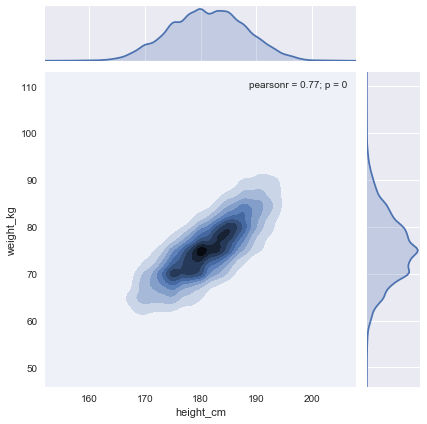

In [16]:
sns.jointplot(x='height_cm', y='weight_kg', data=fifa, kind="kde")

Let's take a quick glance at the statistics for the height and weight metrics.

In [17]:
fifa.height_cm.describe()

count    17994.000000
mean       181.271980
std          6.690392
min        155.000000
25%        177.000000
50%        181.000000
75%        186.000000
max        205.000000
Name: height_cm, dtype: float64

In [18]:
fifa.weight_kg.describe()

count    17994.000000
mean        75.400856
std          6.994824
min         49.000000
25%         70.000000
50%         75.000000
75%         80.000000
max        110.000000
Name: weight_kg, dtype: float64

Converting to imperial units, we see that the average height is 5'11.4" (min: 5'1", max: 6'8.7"), and the average weight is 166.2 lbs (min: 108 lbs, max: 242.5 lbs).

Let's see if there are any countries that produce significantly taller or shorter players than other countries. We first filter out any countries that contain fewer than 50 players in the dataframe. Then, we find the countries with the tallest and shortest average heights for their players.


In [19]:
fifa_sig = fifa.groupby('nationality')
fifa_sig = fifa_sig.filter(lambda x:x['nationality'].count()>=50)
fifa_sig.groupby('nationality')['height_cm'].mean().sort_values(ascending=False).head(5)

nationality
Bosnia Herzegovina    185.625000
Serbia                184.736842
Czech Republic        184.698630
Croatia               184.373832
Senegal               183.952381
Name: height_cm, dtype: float64

In [20]:
fifa_sig.groupby('nationality')['height_cm'].mean().sort_values(ascending=False).head(5)
fifa_sig.groupby('nationality')['height_cm'].mean().sort_values().head(5)

nationality
Saudi Arabia    175.654434
South Africa    176.387500
Mexico          176.980609
Japan           177.794055
Ghana           178.280702
Name: height_cm, dtype: float64

Let's create a KDE plot comparing the heights and weights of the two countries at the extremes.

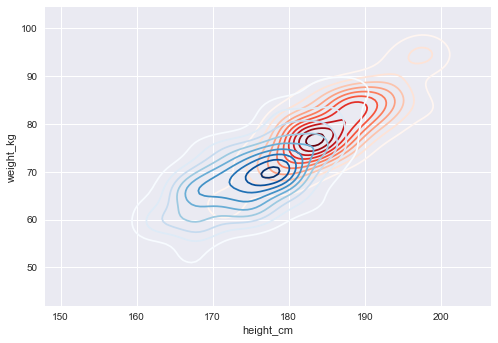

In [21]:
bosnia=fifa[fifa.nationality=='Bosnia Herzegovina']
saudi=fifa[fifa.nationality=='Saudi Arabia']
sns.kdeplot(bosnia.height_cm, bosnia.weight_kg, cmap='Reds')
sns.kdeplot(saudi.height_cm, saudi.weight_kg, cmap='Blues')

The plots clearly shows that players from Bosnia Herzegovina tend to be significantly taller and heavier than the players from Saudi Arabia. This agrees with various lists of [average human height worldwide](https://en.wikipedia.org/wiki/List_of_average_human_height_worldwide), all of which list Bosnia Herzegovina either first or second in terms of average height (and Saudi Arabia near the bottom).

Let's shift our attention to the body composition per position. We use a boxplot; the box itself contains the interquartile range (IQR), i.e., from 25% to 75%. The whiskers extend above and below the box, each with a length of $1.5*IQR$. Outside of the whiskers, the outliers are included as marks. The notch in the box displays the median of the data.

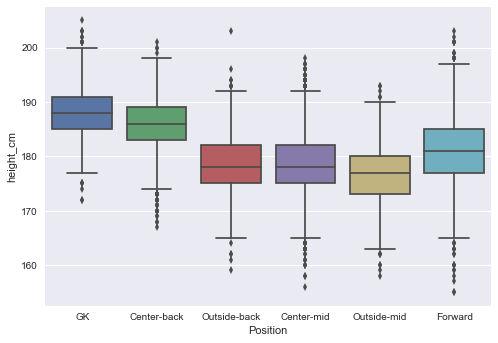

In [22]:
sns.boxplot(x='Position', y='height_cm', data=fifa, order=pos_order)

Wow, there are a few notable things to point out.

* The goalkeepers are tallest, which is to be expected since there is a high correlation between height and wingspan.
* The IQR of the center-backs and the outside-backs do not even overlap! This makes sense and highlights why we separated the two defender positions. Center-backs tend to be tall so that they can win headers in and around the 18-yard box. Outside-backs need to man-mark speedy forwards, and thus tend to be smaller in stature.
* The outside-mids are the shortest on average. They need to be able to fly down the wings at incredible speeds to deliver crosses to the trailing forwards.

It appears that forwards have the most spread out height distribution. Let's glance at the violin plot for further details.

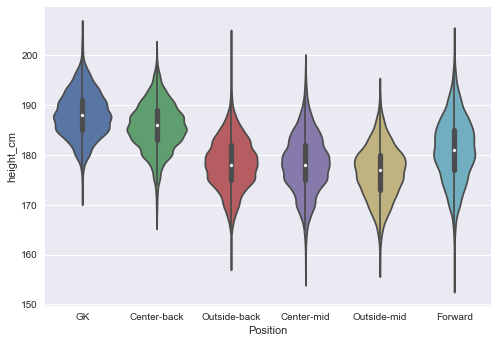

In [23]:
sns.violinplot(x='Position', y='height_cm', data=fifa, order=pos_order)

Yes, it is clear that the forwards are the most spread out in terms of height. For numerical data, we can turn to the standard deviation.

In [24]:
fifa.groupby('Position')['height_cm'].std()

Position
Center-back     4.766720
Center-mid      5.793662
Forward         6.515699
GK              4.604998
Outside-back    5.088083
Outside-mid     5.319471
Name: height_cm, dtype: float64

Let's calculate the linear correlation between height and weight per position.

In [25]:
fifa.groupby('Position')[['height_cm', 'weight_kg']].corr()

height_cm  weight_kg
Position                                    
Center-back  height_cm   1.000000   0.625164
             weight_kg   0.625164   1.000000
Center-mid   height_cm   1.000000   0.700717
             weight_kg   0.700717   1.000000
Forward      height_cm   1.000000   0.731472
             weight_kg   0.731472   1.000000
GK           height_cm   1.000000   0.587178
             weight_kg   0.587178   1.000000
Outside-back height_cm   1.000000   0.633062
             weight_kg   0.633062   1.000000
Outside-mid  height_cm   1.000000   0.665286
             weight_kg   0.665286   1.000000

The position with the lowest correlation between height and weight is goalkeeper. Since goalkeepers aren't required to run miles on end during the game, they can come in a variety of shapes and sizes. While some goalkeepers are extremely tall and lanky, others are short and stout (with unusually long arms).

# Top 5 Leagues <a name="leagues"></a>

It is widely acknowledged that the top 5 leagues in the world are the
* Spanish Primera División
* English Premier League
* Italian Serie A
* German Bundesliga
* French Ligue 1.

While the exact order is up for debate, I will keep them in this order, as per the [current UEFA coefficients](https://www.uefa.com/memberassociations/uefarankings/country/).
 To begin with, let's take a look at the average overall score per player per league.

In [26]:
leagues=['Spanish Primera División', 'English Premier League', 'Italian Serie A', 'German Bundesliga', 'French Ligue 1']
fifa_sub = fifa.loc[fifa.league.isin(leagues)]
fifa_sub.groupby('league')['overall'].mean()

league
English Premier League      72.409786
French Ligue 1              70.453177
German Bundesliga           72.428305
Italian Serie A             72.588551
Spanish Primera División    73.686047
Name: overall, dtype: float64

It seems that the Spanish league has the highest average quality of players and that the French league is far behind the other 4. Let's look at a strip plot, conditioned on position, to get a better sense of things.

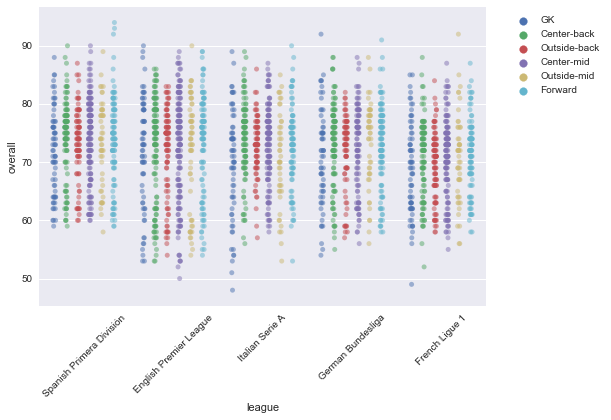

In [27]:
_ = sns.stripplot(x='league', y='overall', hue='Position', data=fifa_sub, dodge=0.6, jitter=True, alpha=.5, order=leagues, hue_order=pos_order)
loc, labels = plt.xticks()
_.set_xticklabels(labels, rotation=45)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

It's tough to glean insight from this plot due to the sheer number of points. A boxplot will be more useful.

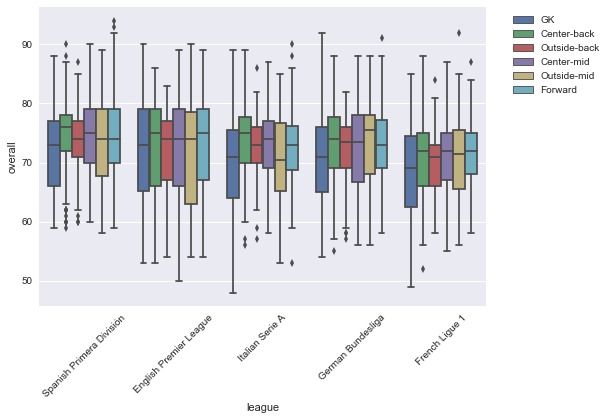

In [28]:
_=sns.boxplot(x='league', y='overall', hue='Position', data=fifa_sub, order=leagues, hue_order=pos_order)
loc, labels = plt.xticks()
_.set_xticklabels(labels, rotation=45)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

It is clear that the Spanish teams have a higher lower-floor, i.e., their teams have much greater depth from the bench. While the English league seems to be well balanced by position, note that the outside-mids in the Italian league are far worse than the other positions, while the outside-mids in the German league are far better. To savvy soccer fans, this last observation makes perfect sense; the Bundesliga is known for its frenetic pace, sending wingers tearing down the sidelines, while the Serie A has a slower, more defense, play-not-to-lose style.

Let's take a look at the rankings of the top 50 players in each league. (Since this is a ranking, the lower the number the better).

[Text(0,0,'Spanish Primera División'),
 Text(0,0,'English Premier League'),
 Text(0,0,'Italian Serie A'),
 Text(0,0,'German Bundesliga'),
 Text(0,0,'French Ligue 1')]

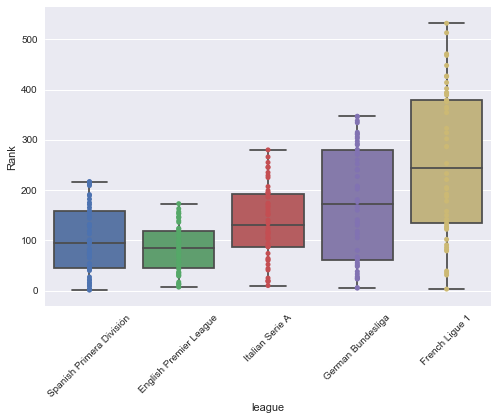

In [29]:
fifa_sub_top = fifa_sub.groupby('league').head(50)
_ = sns.boxplot(x='league', y='Rank', data=fifa_sub_top, order=leagues)
_ = sns.stripplot(x='league', y='Rank', data=fifa_sub_top, order=leagues)
loc, labels = plt.xticks()
_.set_xticklabels(labels, rotation=45)

It's very interesting to see that when just looking at the top 50 players in each league, the English league appears have the best ranking. However, with rankings, there are some nuances with boxplots that don't make them the best visual representation. Let's instead turn to a stackplot. The x-axis will represent the cumulative rankings, and the y-axis shows the percentage of players ranked at that point (i.e., at x=10, players ranked 1-10 will be represented) per country. Let's first perform this visual up to rank 100, then we will expand to 1000. 

Text(0.5,0,'Player Ranking')

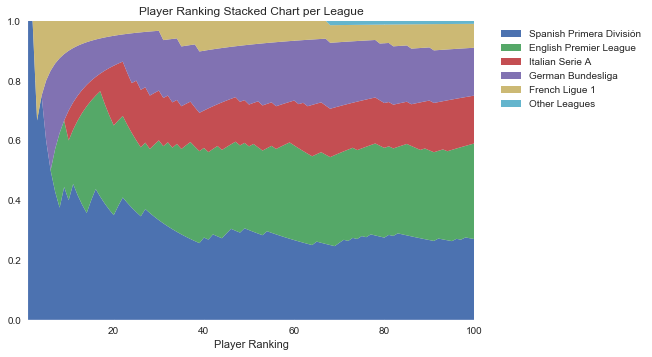

In [30]:
top=100
fifa_top = fifa.head(top)

top_vec=[None]*(len(leagues))
for L in range(len(leagues)):
    top_vec[L] = [((fifa_top.Rank<=x+1) & (fifa_top.league==leagues[L])).sum() for x in range(top)]
#need to calculate the 'other' league
other = [None]*top
top_vec_numpy = np.array(top_vec)
for r in range(top):
    other[r] = r-np.sum(top_vec_numpy[:,r])+1

#now let's make the data frame
top_df = pd.DataFrame({leagues[0]:top_vec[0],
                     leagues[1]:top_vec[1],
                     leagues[2]:top_vec[2],
                     leagues[3]:top_vec[3],
                     leagues[4]:top_vec[4],
                     'Other Leagues':other}, index=range(1,top+1))

top_df_perc = top_df.divide(top_df.sum(axis=1), axis=0)
plt.stackplot(range(1,top+1), top_df_perc[leagues[0]], top_df_perc[leagues[1]],
              top_df_perc[leagues[2]], top_df_perc[leagues[3]],
              top_df_perc[leagues[4]], top_df_perc['Other Leagues'],
              labels=[*leagues, 'Other Leagues'])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.margins(0,0)
plt.title('Player Ranking Stacked Chart per League')
plt.xlabel('Player Ranking')

It appears that the Spanish league has a high-percentage of the very, very best players in the world. The French league gets an early boost from Neymar, ranked 3rd in the world, but doesn't get another player ranked until rank 30. Let's take a look at the percentages at the top 10 and the top 100.

In [31]:
#top-10
top_df_perc.iloc[9]

English Premier League      0.2
French Ligue 1              0.1
German Bundesliga           0.2
Italian Serie A             0.1
Other Leagues               0.0
Spanish Primera División    0.4
Name: 10, dtype: float64

In [32]:
#top-100
top_df_perc.iloc[-1]

English Premier League      0.32
French Ligue 1              0.08
German Bundesliga           0.16
Italian Serie A             0.16
Other Leagues               0.01
Spanish Primera División    0.27
Name: 100, dtype: float64

While the English league gets off to a slow start, they actually have more top-100 players than any other league. One thing that is remarkable is the utter dominance of the top 5 leagues. There is only 1 player ranked in the top 100 who is not in the main 5 leagues. Let's find out who it is.

In [33]:
fifa.loc[~fifa.league.isin(leagues)][['name', 'Rank', 'club', 'league', 'nationality', 'overall']].head(1)

,name,Rank,club,league,nationality,overall
67,Pepe,68,Beşiktaş JK,Turkish Süper Lig,Portugal,86


We now perform the same actions, but this time we get the stack plot for the top 1000 players instead of the top 100.

Text(0.5,0,'Player Ranking')

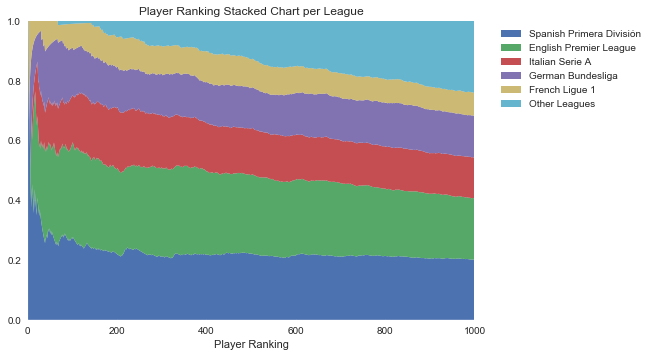

In [34]:
top=1000
fifa_top = fifa.head(top)

top_vec=[None]*(len(leagues))
for L in range(len(leagues)):
    top_vec[L] = [((fifa_top.Rank<=x+1) & (fifa_top.league==leagues[L])).sum() for x in range(top)]
#need to calculate the 'other' league
other = [None]*top
top_vec_numpy = np.array(top_vec)
for r in range(top):
    other[r] = r-np.sum(top_vec_numpy[:,r])+1

#now let's make the data frame
top_df = pd.DataFrame({leagues[0]:top_vec[0],
                     leagues[1]:top_vec[1],
                     leagues[2]:top_vec[2],
                     leagues[3]:top_vec[3],
                     leagues[4]:top_vec[4],
                     'Other Leagues':other}, index=range(1,top+1))

top_df_perc = top_df.divide(top_df.sum(axis=1), axis=0)
plt.stackplot(range(1,top+1), top_df_perc[leagues[0]], top_df_perc[leagues[1]],
              top_df_perc[leagues[2]], top_df_perc[leagues[3]],
              top_df_perc[leagues[4]], top_df_perc['Other Leagues'],
              labels=[*leagues, 'Other Leagues'])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.margins(0,0)
plt.title('Player Ranking Stacked Chart per League')
plt.xlabel('Player Ranking')

In [35]:
#top-1000
top_df_perc.iloc[-1]

English Premier League      0.205
French Ligue 1              0.077
German Bundesliga           0.139
Italian Serie A             0.137
Other Leagues               0.241
Spanish Primera División    0.201
Name: 1000, dtype: float64

These figures clearly demonstrate that the English and Spanish leagues are ahead of their competitors. Almost every starting player in these two leagues are ranked in the top 1000.

# England vs. Germany PKs <a name="PKs"></a>

When it comes to Penalty Kicks in international competitions, two teams clearly stand out from the norm: England and Germany. England has a woeful history with PKs, losing all 3 in World Cup competitions, and winning only 1 out of 7 including the European Cup. Their relentless choking during PKs is well documented ([1](https://www.theguardian.com/football/2016/jun/27/england-penalties-20-years-hurt-iceland-germany), [2](https://www.telegraph.co.uk/men/the-filter/10843004/Why-are-England-so-bad-at-penalty-shoot-outs.html), [3](http://blogs.bcu.ac.uk/views/2016/06/15/why-are-england-so-bad-at-penalty-shootouts/), [4](https://www.ft.com/content/f32c2ac6-ec4a-11e3-ab1b-00144feabdc0)) and may be adding to the continuing pressure in a [feedback loop](http://www.popularsocialscience.com/2012/11/28/the-psychology-of-penalty-shootouts-why-do-england-always-lose/). At the opposite end of the spectrum, the German team is legendary for their calm demeanor in expertly executing PKs, winning [all 4](https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_penalty_shoot-outs) of their PKs during World Cups. In fact, their last PK loss (in the WC or Euro) dates back more than 42 years, at the Euro 1976. There are very few things in international soccer as sure bets as England losing a PK and Germany winning.

FIFA 18 includes a **Penalty** stat that describes how good a player is at taking a penalty kick. Let's investigate the differences between England and Germany.

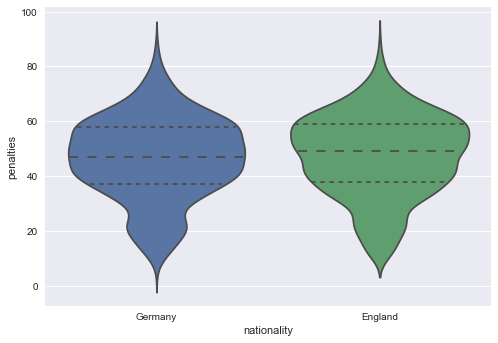

In [36]:
countries = ['England', 'Germany']
fifa_pen = fifa.loc[fifa.nationality.isin(countries)]
sns.violinplot(x='nationality', y='penalties',  data=fifa_pen, inner='quartile')

This plot is surprising, it seems that English players have the slight edge over German player in the penalties stat. Let's break this down by position; it could be that players who are unlikely to take PKs in the first place are bringing down the German distribution.

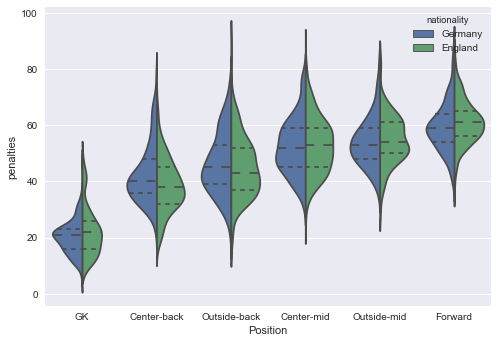

In [37]:
sns.violinplot(x='Position', y='penalties', hue='nationality', data=fifa_pen, split=True, inner='quartile', order=pos_order)

Wow, it seems like England really does have the edge over Germany in penalty stats for offensive players.

PKs are a two-sided coin though, and goalkeepers play a huge role in the outcome. Let's see if there are any differences in the overall quality of GKs between these two countries.

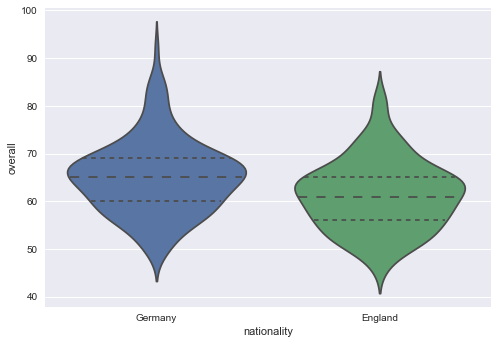

In [38]:
sns.violinplot(x='nationality', y='overall', data=fifa_pen[fifa_pen.Position=='GK'], inner='quartile')

This is quite illuminating. The median overall metric for German GKs is at the same level as the 75th percentile overall metric for English GKs. Also note that England doesn't seem to really have any world-class GKs at the top of the violin plot. Since only the very best GKs per country really matter during an international tournament, let's see how the top GKs from each country compare.

In [39]:
fifa_pen.loc[(fifa_pen['Position']=='GK') & (fifa_pen['nationality']=='Germany')][['name', 'club', 'overall']].head(7)

,name,club,overall
4,M. Neuer,FC Bayern Munich,92
79,B. Leno,Bayer 04 Leverkusen,85
80,M. ter Stegen,FC Barcelona,85
104,T. Horn,1. FC Köln,84
117,R. Fährmann,FC Schalke 04,84
240,O. Baumann,TSG 1899 Hoffenheim,82
353,K. Trapp,Paris Saint-Germain,81


In [40]:
fifa_pen.loc[(fifa_pen['Position']=='GK') & (fifa_pen['nationality']=='England')][['name', 'club', 'overall']].head(7)

,name,club,overall
288,J. Hart,West Ham United,82
320,J. Butland,Stoke City,81
376,T. Heaton,Burnley,81
502,B. Foster,West Bromwich Albion,80
1057,J. Pickford,Everton,77
1109,F. Forster,Southampton,77
1812,A. McCarthy,Southampton,75


These latest stats provide some deep insight. The 6 best German GKs are all ranked higher than J. Hart, the highest rated English GK. In addition to the mounting pressure the English players feel to break the PK curse, it can't help that they do not have a single choice for a world-class GK. On the other hand, the German players can keep their nerve, knowing they have a choice between some of the best GKs in the world.

# Southpaws <a name="southpaws"></a>
Lefties make up roughly [10%](https://en.wikipedia.org/wiki/Handedness) of the population. However, it is well documented that in some sports, lefties make up a much larger proportion (e.g., 39% of hitters and 28% of pitchers [played left-handed](http://www.gamesensesports.com/knowledge/2017/3/17/righties-vs-lefties-the-importance-of-handedness-training-in-baseball-hitting) in the 2012 MLB season).

In soccer, we expect to see higher than 10% of players as left-footed since being left-footed is an advantage when playing on the left side of the field. This is especially true for left wingers who race down the sideline in order to whip in a cross. Let's investigate the percentages.

In [41]:
fifa[fifa.preferred_foot=='Left']['ID'].count()/fifa.shape[0]

0.23624541513837946

We see that 23% of the players in the dataframe are left-footed, which agrees with our intuition. Let's see if there is any significant difference in the overall quality of players based on foot preference.

In [42]:
fifa.groupby('preferred_foot')['overall'].mean()

preferred_foot
Left     66.679840
Right    66.121007
Name: overall, dtype: float64

These scores are very close together, hinting that there is no discernable difference between the overall quality of left-footed player and right-footed players on average. However, in order to see if this difference of 0.5 is likely due to noise, our analysis must go one level deeper. Here, we use the [bootstrapping method](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)), in which we resample our players (with replacement). The advantage of the bootstrapping method is that it gives us intuition as to whether this 0.5 difference is statistically significant without having to assume any underlying distribution.

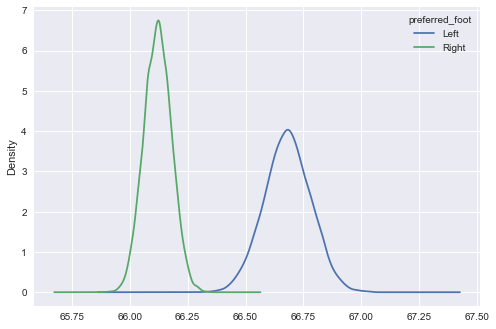

In [43]:
iterations=10000
boot=[]
for i in range(iterations):
    boot_mean = fifa.sample(frac=1, replace=True).groupby('preferred_foot')['overall'].mean()
    boot.append(boot_mean)
    
boot=pd.DataFrame(boot)
boot.plot.kde()

It does appear that the difference, albeit small, is real. In fact, over the 10000 bootstrapping iterations, not once did the right-footers have a higher overall mean than the left-footers (as shown with the following code).

In [44]:
((boot['Left']-boot['Right'])<0).sum()

0

Let's breakdown the left-footed percentages by nationality. We only consider countries that have 100 or more players in the dataframe.

Text(0,0.5,'Percentage of Players Left-Footed')

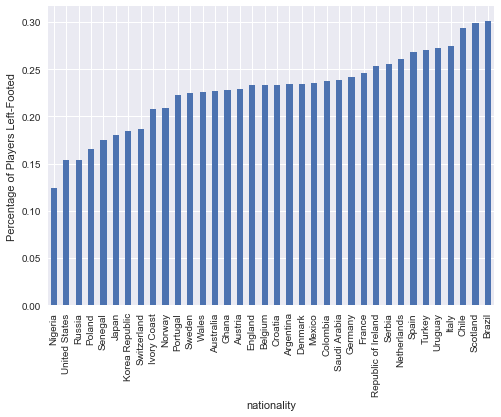

In [45]:
fifa_sig = fifa.groupby('nationality')
fifa_sig = fifa_sig.filter(lambda x:x['nationality'].count()>=100)

fifa_left = pd.DataFrame(fifa_sig[fifa_sig.preferred_foot=='Left'].groupby('nationality')['ID'].count())
fifa_left['left_perc']= fifa_left['ID'].divide(fifa_sig.groupby('nationality')['ID'].count())
fifa_left_sorted = fifa_left.sort_values('left_perc')

_ = fifa_left_sorted.left_perc.plot.bar(rot=90)
plt.ylabel('Percentage of Players Left-Footed')

Glancing at the order of countries, there doesn't appear to be any geographic or political correlations with the percentage of left-footed players.

Let's try to go one step deeper with a bubble plot.
* On the x-axis, we take the average overall score for the best 11 players per country.
* On the y-axis, we have the percentage of total players in the country that are left-footed.
* The size of the bubble corresponds to the raw number of player (for the given country) that are ranked in the top 1500.

Text(0.5,0,'Average Overall Rating if Top 11 Players')

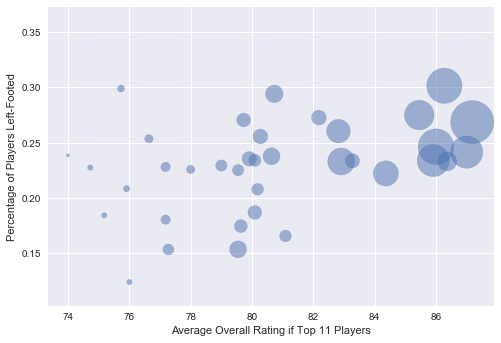

In [46]:
fifa_best11 = fifa_sig.groupby('nationality').head(11)
#calculate average overall raiting per coutnries best 11
fifa_best11 = fifa_best11.groupby('nationality')['overall'].mean()
fifa_left['Overall'] = fifa_best11
#now we want to calculate the number per country in the top 1000
fifa_top1000 = fifa_sig[fifa_sig.Rank<=1500].groupby('nationality')['ID'].count()

#bubble plot
plt.scatter(fifa_best11, fifa_left.left_perc, s=10*fifa_top1000, alpha=0.5)
plt.ylabel('Percentage of Players Left-Footed')
plt.xlabel('Average Overall Rating if Top 11 Players')

It is impossible to draw correlation/causation results from this plot. However, it is worthwhile to note that the 7 countries at the elite level (who's average overall score for their starting-11 is over 85) also have a higher than average percentage of left-footed players.

# Similarity <a name="similarity"></a>

For fun, let's build a function such that when given a name, it returns the 5 players who are the most similar. The idea of similarity when it comes to soccer players is subjective, but we will be basing it solely on the subjective numeric stats. We will not include any categorical features such as club, league, nationality, position, etc. We also will not include objective physical features such as age, height and weight. There are two major steps to this process.
* First, we perform principle component analysis (PCA). We will be using 45 different metrics to begin with, but many of these are highly correlated with one another. We will use PCA to reduce this number to 10. This reduction in dimension helps to reduce the bias possibly introduced by EA's selection of specific metrics that are similar. Note that these remaining 10 dimensions do not necessarily correspond to any specific metrics, but rather a correlated cluster of them.
* Second, we perform the nearest neighbors calculation to find the closest neighbors based on the numbers in reduced dimensions.

In [47]:
fifa_stats1 = fifa.loc[:,'overall':'weak_foot']
fifa_stats2 = fifa.loc[:,'crossing':'gk_reflexes']
fifa_stats = pd.concat([fifa_stats1, fifa_stats2], axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(fifa_stats.head())

,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,94,94,90,93,82,90,33,80,5,5,4,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11
1,93,93,89,90,86,96,26,61,5,4,4,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8
2,92,94,92,84,79,95,30,60,5,5,5,75,89,62,81,83,96,81,84,75,95,94,90,96,88,82,80,61,78,53,77,56,36,90,80,81,92,21,24,33,9,9,15,15,11
3,92,92,82,90,79,87,42,81,5,4,4,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45,38,27,25,31,33,37
4,92,92,91,90,95,89,60,91,5,1,4,15,13,25,55,11,30,14,11,59,48,58,61,52,85,35,25,78,44,83,16,29,30,12,70,47,70,10,10,11,91,90,95,91,89


First we standardize all the metrics to have a mean of zero and unit variance. This standardization provides a fair way to measure the various attributes since they have different means and distributions.

In [48]:
from sklearn.preprocessing import StandardScaler
fifa_stats = StandardScaler().fit_transform(fifa_stats)

In [49]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
components = pca.fit_transform(fifa_stats)

In [50]:
#NearestNeighbors
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=6).fit(components)
distances, indices = nbrs.kneighbors(components)

Now that we have the nearest neighbors indices, we are ready to create our function. (Both the *fifa* dataframe and the *indices* numpy array are accessible in the scope of the following function.)

In [51]:
def similar_players(player):
    #First let's make sure there is exactly one player with the matching name
    if fifa[fifa.name==player].size==0:
        print('No player by that name.')
        return
    elif fifa[fifa.name==player].shape[0]>1:
        print('Multiple players by that name, sorry.')
        return
    #First we get the index of the player
    idx = fifa[fifa.name==player].index[0]
    #Get the indices of the 5 neighbors
    n_idx = indices[idx,1:]
    #Subset the fifa dataframe
    fifa_similar = fifa.iloc[n_idx]
    #Print out the results
    display(fifa_similar.loc[:,['name', 'club', 'league', 'nationality', 'Position']])
    

Now it's time to try it out. Even though we didn't pass in information about the players’ position, it stands to reason that the most similar players would have similar roles. Let's try the function with a few players.

In [52]:
#My favorite defender, John Brooks
similar_players('J. Brooks')

,name,club,league,nationality,Position
551,A. Romagnoli,Milan,Italian Serie A,Italy,Center-back
370,D. Astori,Fiorentina,Italian Serie A,Italy,Center-back
303,D. Sánchez,Tottenham Hotspur,English Premier League,Colombia,Center-back
417,M. Nastasić,FC Schalke 04,German Bundesliga,Serbia,Center-back
219,A. Rüdiger,Chelsea,English Premier League,Germany,Center-back


In [53]:
#Best American prospect, Christian Pulisic
similar_players('C. Pulisic')

,name,club,league,nationality,Position
1484,Daniel Podence,Sporting CP,Portuguese Primeira Liga,Portugal,Forward
1207,L. Bailey,Bayer 04 Leverkusen,German Bundesliga,Jamaica,Outside-mid
835,L. Acosta,Club Atlético Lanús,Argentinian Superliga,Argentina,Outside-mid
1009,J. Aquino,Tigres U.A.N.L.,Mexican Liga MX,Mexico,Outside-mid
3303,B. Fernández,FC Metz,French Ligue 1,Argentina,Forward


In [54]:
#Best player on the LA Galaxy (imo)
similar_players('R. Alessandrini')

,name,club,league,nationality,Position
584,Y. Konoplyanka,FC Schalke 04,German Bundesliga,Ukraine,Outside-mid
560,E. Višća,İstanbul Başakşehir FK,Turkish Süper Lig,Bosnia Herzegovina,Outside-mid
965,Y. Salibur,En Avant de Guingamp,French Ligue 1,France,Outside-mid
607,A. Ljajić,Torino,Italian Serie A,Serbia,Center-mid
1989,M. Oršić,Ulsan Hyundai Horang-i,Korean K League Classic,Croatia,Outside-mid


In [55]:
#Best player in MLS
similar_players('S. Giovinco')

,name,club,league,nationality,Position
301,Malcom,Girondins de Bordeaux,French Ligue 1,Brazil,Outside-mid
354,R. Boudebouz,Real Betis Balompié,Spanish Primera División,Algeria,Center-mid
434,Pablo Sarabia,Sevilla FC,Spanish Primera División,Spain,Center-mid
607,A. Ljajić,Torino,Italian Serie A,Serbia,Center-mid
206,F. Bernardeschi,Juventus,Italian Serie A,Italy,Forward


In [56]:
#According to EA, the best player in the world
similar_players('Cristiano Ronaldo')

,name,club,league,nationality,Position
3,L. Suárez,FC Barcelona,Spanish Primera División,Uruguay,Forward
5,R. Lewandowski,FC Bayern Munich,German Bundesliga,Poland,Forward
16,S. Agüero,Manchester City,English Premier League,Argentina,Forward
1,L. Messi,FC Barcelona,Spanish Primera División,Argentina,Forward
13,A. Sánchez,Arsenal,English Premier League,Chile,Forward


In [57]:
#American GK, hero of the 2016 WC
similar_players('T. Howard')

,name,club,league,nationality,Position
983,D. Benaglio,AS Monaco,French Ligue 1,Switzerland,GK
673,I. Akinfeev,CSKA Moscow,Russian Premier League,Russia,GK
680,G. Ochoa,Standard de Liège,Belgian First Division A,Mexico,GK
384,C. Carrasso,Galatasaray SK,Turkish Süper Lig,France,GK
872,N. Guzmán,Tigres U.A.N.L.,Mexican Liga MX,Argentina,GK


While not perfect, this is a fun function that can help fans discover new players. For example, next time the EPL is on TV, I'll keep a lookout for Davinson Sánchez, a Colombian CB for Tottenham Hotspur, since he apparently is a top match for my favorite defender, John Brooks.